Found 1178 files belonging to 3 classes.
Using 884 files for training.
Found 1178 files belonging to 3 classes.
Using 294 files for validation.
Found 393 files belonging to 3 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 585ms/step - loss: 1.3354 - sparse_categorical_accuracy: 0.3046
Initial loss: 1.335
Initial accuracy: 0.306
Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 827ms/step - loss: 1.4071 - sparse_categorical_accuracy: 0.3523 - val_loss: 1.3203 - val_sparse_categorical_accuracy: 0.3537
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 520ms/step - loss: 1.4406 - sparse_categorical_accuracy: 0.3402 - val_loss: 1.3110 - val_sparse_categorical_accuracy: 0.3401
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 559ms/step - loss: 1.5551 - sparse_categorical_accuracy: 0.2984 - val_loss: 1.3017 - val_sparse_categorical_accuracy: 0.3401
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 589ms/step - loss: 1.4245 - sparse_categorical_accuracy: 0.3404 - val_loss: 1.2945 - val_sparse_categorical_accuracy: 0.3401
Epoch 5/5
28/2

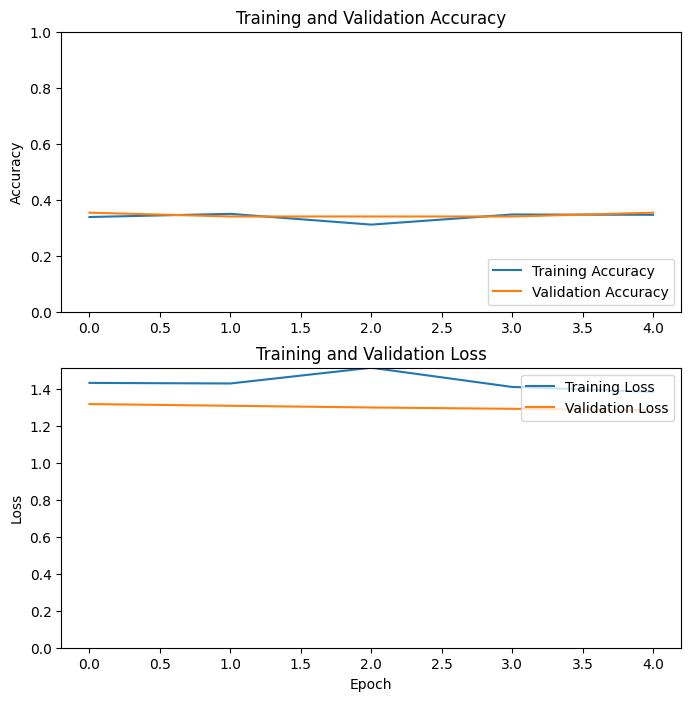

In [3]:
# Directories for training and test data
train_dir = '../ML2Project/Dataset_Original/train'
test_dir = '../ML2Project/Dataset_Original/test'

# Import necessary libraries
from dataPreparation import load_and_prepare_datasets, get_data_augmentation
import matplotlib.pyplot as plt
import tensorflow as tf

# Image sizes and batch size
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3,)
BATCH_SIZE = 32

# Load and prepare the dataset
train_dataset, validation_dataset, test_dataset = load_and_prepare_datasets(train_dir, test_dir, IMAGE_SIZE, BATCH_SIZE)

# Get the data augmentation layers
data_augmentation = get_data_augmentation()

base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', 
                                                  include_top=False, 
                                                  input_shape= IMAGE_SHAPE)
base_model.trainable = False

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

# Add fine-tuning layers
inputs = tf.keras.Input(shape=IMAGE_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name='corn_leaf_classifier')

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# Initial loss and accuracy
loss0, accuracy0 = model.evaluate(validation_dataset)
print(f'Initial loss: {loss0:.3f}')
print(f'Initial accuracy: {accuracy0:.3f}')

# Train the model
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

# Evaluate and visualize
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test loss: {test_loss:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

# Plot the training progress
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')

plt.show()